# Basic Matplotlib cookbook

This notebook shows you how to generate basic versions of the common plots you'll need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Get some sample data

In [2]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [3]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_mpg

CYL
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: MPG, dtype: float64

In [4]:
# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']
avg_mpg_per_wgt

WGT
1613    35.000000
1649    31.000000
1755    39.099998
1760    35.099998
1773    31.000000
          ...    
4951    12.000000
4952    12.000000
4955    12.000000
4997    11.000000
5140    13.000000
Name: MPG, Length: 346, dtype: float64

In [5]:
# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())
cyl

[3, 4, 5, 6, 8]

In [6]:
# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

## A visual buffet of the most common plots

This section shows how to draw very basic plots using my recommended template:

```
fig, ax = plt.subplots(figsize=(width,height))
ax.plottype(args)
plt.show()
```

The default plot style is not particularly beautiful nor informative, but we have to learn the basics first.

### Histogram of car weight visualized as barchart

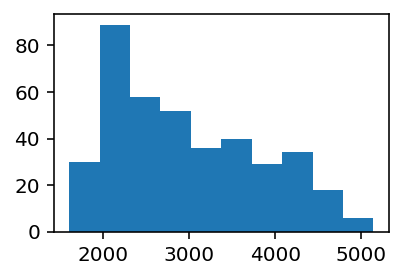

In [7]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.hist(df_cars['WGT'])
plt.show()

### Line plot of number of cylinders vs average miles per gallon

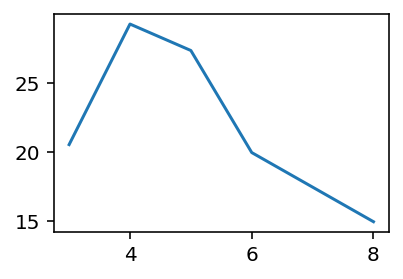

In [8]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.plot(cyl, avg_mpg)
plt.show()

### Scatterplot of weight versus miles per gallon

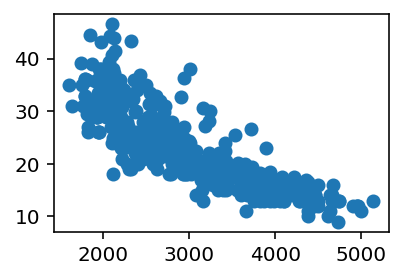

In [9]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.scatter(df_cars['WGT'], df_cars['MPG'])
plt.show()

Note that if you try to use `plot()` it gives you a screwed up plot; line drawing is not appropriate for data with multiple Y values per X value. Instead, the 

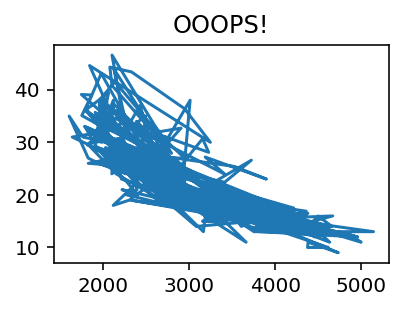

In [10]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.plot(df_cars['WGT'], df_cars['MPG'])
ax.set_title("OOOPS!")
plt.show()

### Line plot of average miles per gallon grouped by weight

If we want to use a line plot,  we should plot the weight versus average miles per gallon at that weight.

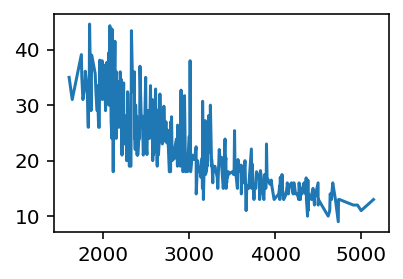

In [11]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.plot(avg_mpg_per_wgt)
plt.show()

I'm using a trick here. Note that `avg_mpg_per_wgt` is a series, which has an index (WGT) and the value (MPG)  so I can pass this as a single parameter to matplotlib. matplotlib is flexible enough to recognize this and pull out the X and Y coordinates automatically for us.

In [12]:
avg_mpg_per_wgt

WGT
1613    35.000000
1649    31.000000
1755    39.099998
1760    35.099998
1773    31.000000
          ...    
4951    12.000000
4952    12.000000
4955    12.000000
4997    11.000000
5140    13.000000
Name: MPG, Length: 346, dtype: float64

### Bar chart of average miles per gallon grouped by number of cylinders

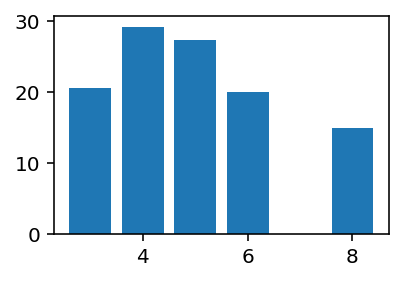

In [13]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
plt.show()

### Box plot of miles per gallon grouped by number of cylinders

A box plot needs a collection of values for each X coordinate, and we are passing in three lists.

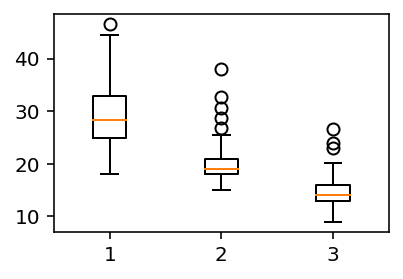

In [14]:
fig, ax = plt.subplots(figsize=(3,2))
ax.boxplot([cyl4,cyl6,cyl8])
plt.show()

### Violin plot of miles per gallon grouped by number of cylinders

As with box plot, we need a collection of values for each X coordinate. All we've done here is to change the function we're calling.

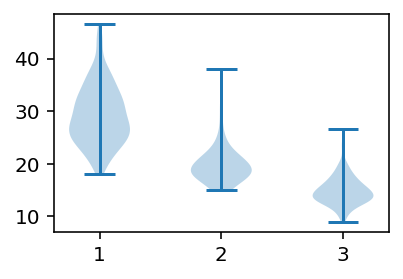

In [15]:
fig, ax = plt.subplots(figsize=(3,2))
ax.violinplot([cyl4,cyl6,cyl8])
plt.show()

## Creating a grid of plots

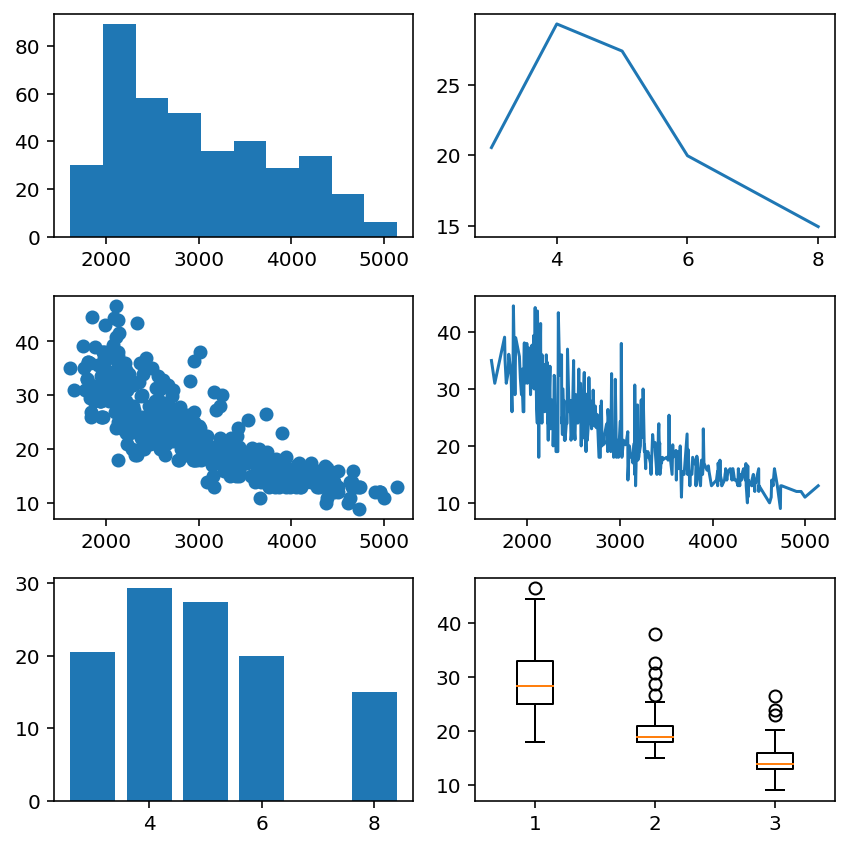

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6,6))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

axes[0].hist(df_cars['WGT'])
axes[1].plot(cyl, avg_mpg)
axes[2].scatter(df_cars['WGT'], df_cars['MPG'])
axes[3].plot(avg_mpg_per_wgt)
axes[4].bar(cyl, avg_mpg)
axes[5].boxplot([cyl4,cyl6,cyl8])

plt.tight_layout() # I add this anytime I have a grid as it "does the right thing"
plt.show()

## Exercise


As an exercise, create your own notebook and retype all of these examples so that you start to memorize the details. Of course, once you have typed in the template a few times, you can cut-and-paste those parts:

```
fig, ax = plt.subplots(figsize=(2,1.5))
...
plt.show()
```